### Import necessary libraries

In [ ]:
import librosa
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

### Function to load audio file and return audio and sample rate

In [ ]:
def load_audio(file_path):
  """Loads an audio file and returns the waveform and sample rate."""
  audio, sr = librosa.load(file_path, sr=None)
  return audio, sr

### Mel Spectrogram is created

In [ ]:
def mel_spectrogram(audio, sr, n_mels=120):
  """Creates a mel spectrogram from the audio waveform."""
  mel_spectrogram = librosa.feature.melspectrogram(y=audio, sr=sr, n_mels=n_mels)
  return mel_spectrogram.T  # Transpose for time on first dimension

### specaugment function that returns a list of augmented mel spectrograms

In [ ]:
def specaugment(mel_spectrogram, time_warping_para=30, freq_masking_para=30, time_masking_para=50):
  """Applies specaugment to the mel spectrogram with specific parameters.

  Args:
      mel_spectrogram: A 2D numpy array representing the mel spectrogram.
      time_warping_para: The maximum amount of time warping to apply (in frequency bins).
      freq_masking_para: The number of frequency channels to mask in each time slice.
      time_masking_para: The number of time steps to mask in each frequency band.

  Returns:
      A list of augmented mel spectrograms (including the original).
  """
  augmented_specs = [mel_spectrogram.copy()]

  # Time warping
  if time_warping_para > 0:
    w = tf.random.uniform([], minval=-time_warping_para, maxval=time_warping_para, dtype=tf.float32)
    time_warped = np.empty_like(mel_spectrogram)
    for n in range(mel_spectrogram.shape[0]):
      time_warped[n] = np.roll(mel_spectrogram[n], int(w))
    augmented_specs.append(time_warped)

  # Frequency masking
  if freq_masking_para > 0:
    num_masks = int(mel_spectrogram.shape[1] * np.random.rand())
    for _ in range(num_masks):
      f0 = np.random.randint(0, mel_spectrogram.shape[1] - freq_masking_para)
      f = freq_masking_para
      mel_spectrogram[:, f0:f0 + f] = 0
    augmented_specs.append(mel_spectrogram.copy())

  # Time masking
  if time_masking_para > 0:
    num_masks = int(mel_spectrogram.shape[0] * np.random.rand())
    for _ in range(num_masks):
      t0 = np.random.randint(0, mel_spectrogram.shape[0] - time_masking_para)
      t = time_masking_para
      mel_spectrogram[t0:t0 + t, :] = 0
    augmented_specs.append(mel_spectrogram.copy())

  return augmented_specs

### Visualizing the spectrograms

In [ ]:
def plot_spectrogram(spectrogram, title=""):
  """Plots the spectrogram using librosa."""
  plt.figure(figsize=(10, 4))
  librosa.display.specshow(librosa.power_to_db(spectrogram, ref=np.max), x_axis='time', y_axis='mel', fmax=8000)
  plt.title(title)
  plt.tight_layout()
  plt.show()

### Update the file path hosting the sample audio file

In [ ]:
# Define file path (replace with your actual file path)
file_path = "/content/sample.mp3"

### Load audio and create mel spectrogram

In [ ]:
audio, sr = load_audio(file_path)
mel_spectrogram = mel_spectrogram(audio, sr)

### Apply specaugment

In [ ]:
augmented_specs = specaugment(mel_spectrogram)

### Comparing the spectrograms generated through Time Warp, Freq. Masking & Time Masking

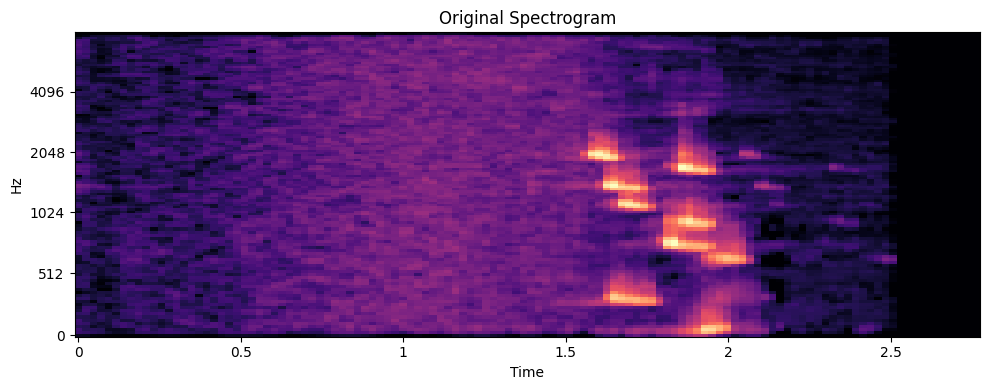

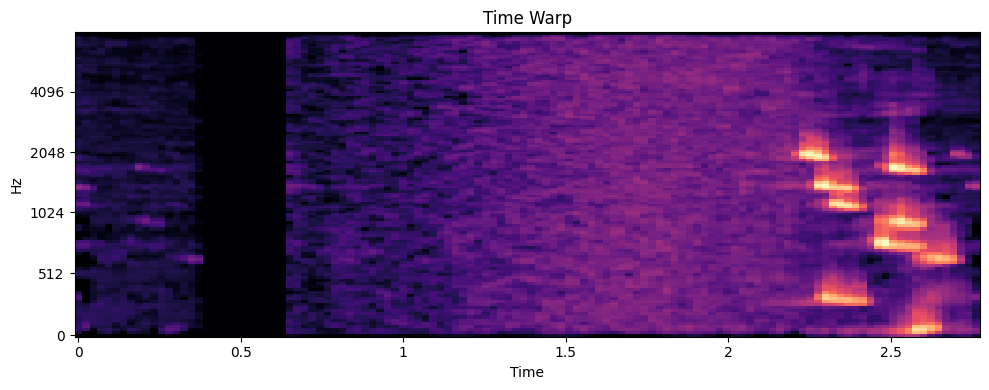

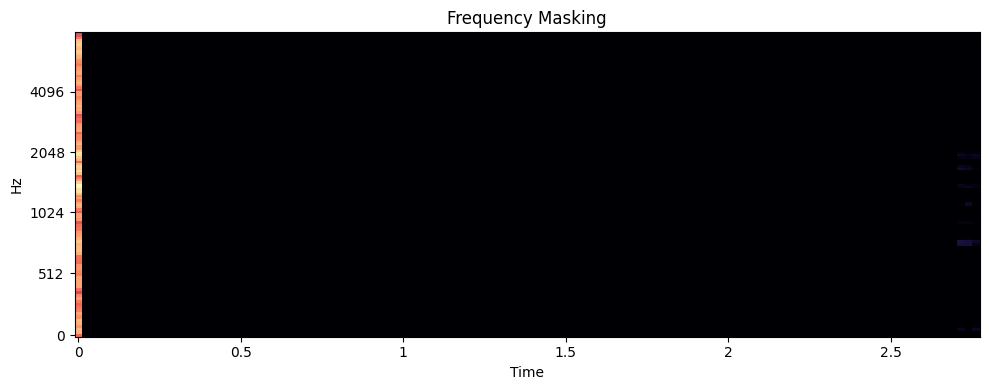

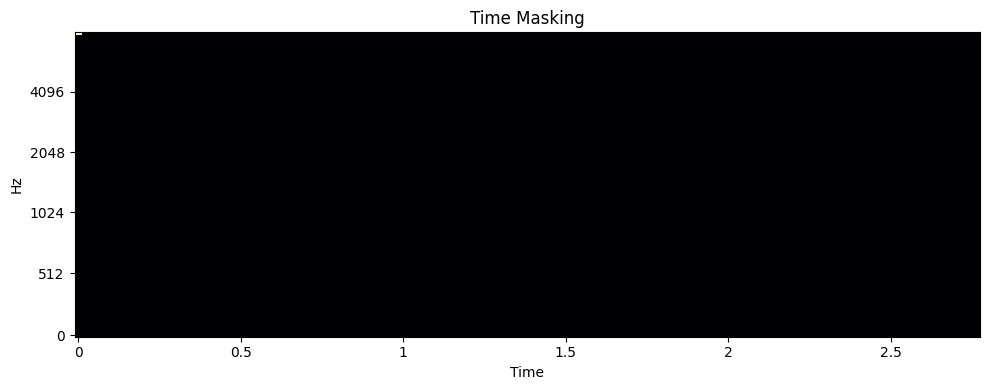

In [ ]:
# Plot original and augmented spectrograms
plot_spectrogram(augmented_specs[0], title="Original Spectrogram")
for i, spec in enumerate(augmented_specs[1:]):
  if i == 0:
    plot_spectrogram(spec, title="Time Warp")
  elif i == 1:
    plot_spectrogram(spec, title="Frequency Masking")
  else:
    plot_spectrogram(spec, title="Time Masking")

### Specaugment for Audio Classification: A Report
#### Introduction

Specaugment is a data augmentation technique widely used in audio classification tasks. It artificially creates variations of the original audio data to improve a model's robustness to real-world variations and prevent overfitting. This report explores the application of specaugment with specific parameter values (time_warping_para=30, freq_masking_para=30, time_masking_para=50) on a sample audio file. The report analyzes the visual effects of these parameters on the mel spectrogram and discusses potential performance implications.

### Methodology

#### Data Preparation:

A sample audio file was loaded.
The mel spectrogram was computed, representing the audio's frequency content on a mel scale.

#### Specaugment Implementation:

A specaugment function was implemented with three methods:
Time warping: Shifts the frequency content along the time axis, simulating variations in speaking speed.
Frequency masking: Sets specific frequency bands to zero, forcing the model to learn from remaining information.
Time masking: Sets specific time segments to zero, requiring the model to infer missing information from context.
Parameter Selection:

The following parameters were chosen for this exploration:
time_warping_para = 30: This value introduces moderate time warping, avoiding excessive distortions.
freq_masking_para = 30: This value masks a reasonable portion of frequency bands in each time slice.
time_masking_para = 50: This value masks a moderate amount of time steps in each frequency band.


### Findings

#### Visualizations:

Original Spectrogram: This represents the baseline frequency distribution of the audio.
Time Warped Spectrogram: A diagonal or slanted shift is observed, indicating a time warp effect.
Frequency Masked Spectrogram: Vertical rectangular blocks appear at random locations, indicating specific frequency bands being masked.
Time Masked Spectrogram: Horizontal rectangular blocks appear at random locations, indicating specific time segments being masked.

#### Expected Performance Impact:

The introduced variations in the spectrograms are expected to improve the model's ability to generalize to unseen audio data.
Time warping helps the model handle slight variations in speaking speed.
Frequency masking forces the model to learn from a broader range of possible frequency content distributions.
Time masking strengthens the model's ability to handle short-term audio occlusions.

#### Limitations:

The findings are based on a single audio file and a specific parameter set. The optimal parameters might differ depending on the dataset and task.
The report focuses on visualization and does not include quantitative evaluation of model performance with and without specaugment.
Future Work

Conduct experiments with different audio datasets and tasks to evaluate the effectiveness of specaugment across various scenarios.
Explore a wider range of parameter values for specaugment and perform hyperparameter tuning to find the best configuration for your specific task.
Integrate specaugment into a deep learning model's training pipeline and quantitatively assess its impact on model performance metrics (e.g., accuracy, F1 score).


#### Conclusion

Specaugment is a valuable technique for audio classification tasks. This report demonstrates its application with
specific parameters and analyzes the visual effects on spectrograms. While the visualizations suggest potential benefits
for generalization, further experimentation and quantitative evaluation are necessary to confirm the performance improvements
on your specific dataset and task.